In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/car_data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
# 1. Find the range of manufacturing years
min_year = data['Year'].min()
max_year = data['Year'].max()
print(f"Vehicles are present from manufacturing year {min_year} to {max_year}.")

Vehicles are present from manufacturing year 2003 to 2018.


In [10]:
#lowest price to which a vehicle is sold
min_price = data['Selling_Price'].min()
print(f"The lowest price a vehicle is sold for: {min_price}")

The lowest price a vehicle is sold for: 0.1


In [12]:
#Find the highest selling price
max_price = data['Selling_Price'].max()
print(f"The highest price a vehicle is sold for: {max_price}")

The highest price a vehicle is sold for: 35.0


In [13]:
# 4. Count the number of records
num_records = data.shape[0]
print(f"Total number of records: {num_records}")

Total number of records: 301


In [14]:
# 5. Check for missing records
missing_values = data.isnull().sum().sum()
print(f"Total missing records: {missing_values}")

Total missing records: 0


In [15]:
# 6. Count the number of unique vehicles
distinct_vehicles = data['Car_Name'].nunique()
print(f"Number of different vehicles present: {distinct_vehicles}")

Number of different vehicles present: 98


In [16]:
# 7. Find the most sold vehicle
most_sold_vehicle = data['Car_Name'].value_counts().idxmax()
most_sold_count = data['Car_Name'].value_counts().max()
print(f"Most sold vehicle: {most_sold_vehicle} (Sold {most_sold_count} times)")

Most sold vehicle: city (Sold 26 times)


In [17]:
# 8. Check for CNG vehicles
cng_vehicles = data[data['Fuel_Type'] == 'CNG'].shape[0]
print(f"Number of CNG vehicles: {cng_vehicles}")

Number of CNG vehicles: 2


In [18]:
# 9. Count vehicles sold by individuals
individual_sales = data[data['Seller_Type'] == 'Individual'].shape[0]
print(f"Number of vehicles sold by individuals: {individual_sales}")

Number of vehicles sold by individuals: 106


In [19]:
# 10. Check for automatic transmission vehicles
auto_transmission_count = data[data['Transmission'] == 'Automatic'].shape[0]
print(f"Number of automatic transmission vehicles: {auto_transmission_count}")

Number of automatic transmission vehicles: 40


In [20]:
# 11 Number of single-person-owned vehicles
single_owner_count = data[data['Owner'] == 0].shape[0]
print("Number of single-person-owned vehicles:", single_owner_count)

Number of single-person-owned vehicles: 290


In [21]:
# 12. Most and least cost depreciated vehicles
data['Depreciation'] = data['Present_Price'] - data['Selling_Price']
most_depreciated = data.loc[data['Depreciation'].idxmax()]
least_depreciated = data.loc[data['Depreciation'].idxmin()]
print("Most depreciated vehicle:", most_depreciated[['Car_Name', 'Depreciation']])
print("Least depreciated vehicle:", least_depreciated[['Car_Name', 'Depreciation']])

Most depreciated vehicle: Car_Name        land cruiser
Depreciation            57.6
Name: 86, dtype: object
Least depreciated vehicle: Car_Name        Honda Activa 4G
Depreciation               0.03
Name: 155, dtype: object


In [22]:
# 13. Brands less affected by depreciation
data['Brand'] = data['Car_Name'].apply(lambda x: x.split()[0])  # Extracting brand name
brand_depreciation = data.groupby('Brand')['Depreciation'].mean().sort_values()
print("Brands less affected by cost depreciation:", brand_depreciation.head())

Brands less affected by cost depreciation: Brand
UM          0.120000
Activa      0.183333
TVS         0.242750
Mahindra    0.250000
Yamaha      0.258750
Name: Depreciation, dtype: float64


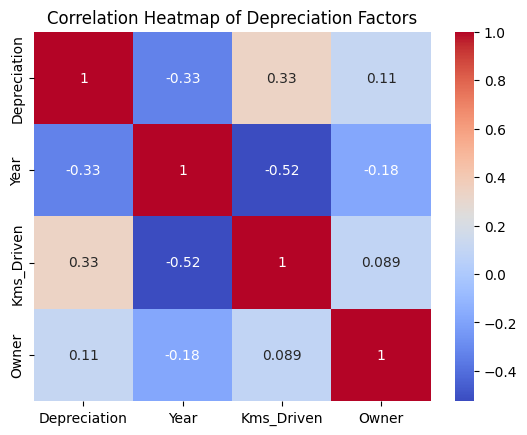

In [23]:
# 14. Factors affecting cost depreciation
correlation_matrix = data[['Depreciation', 'Year', 'Kms_Driven', 'Owner']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Depreciation Factors")
plt.show()

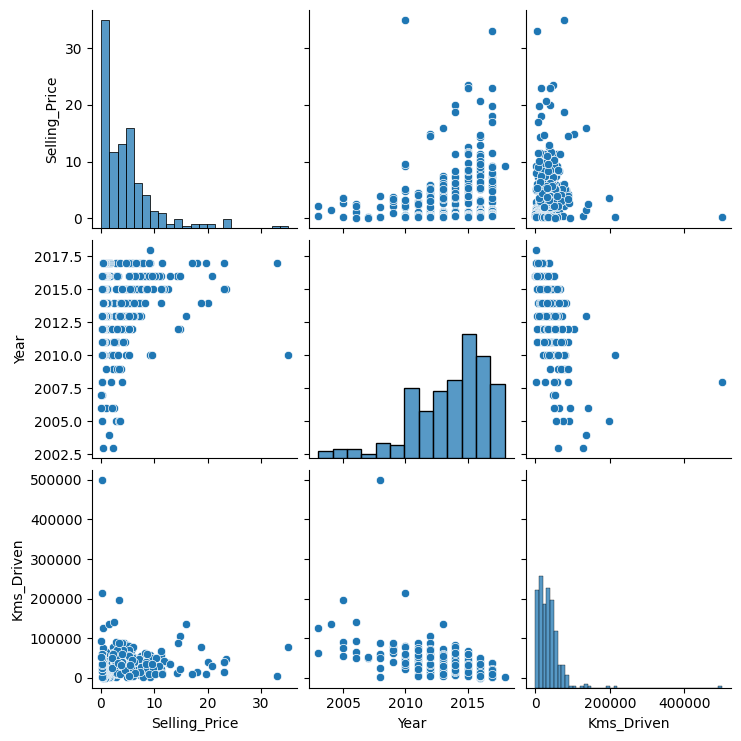

In [24]:
# 15. Selling price vs. age and distance driven
sns.pairplot(data, vars=['Selling_Price', 'Year', 'Kms_Driven'])
plt.show()

In [25]:
# 16. Newest vehicles (manufactured after 2014)
new_vehicles = data[data['Year'] > 2014]
print("Newest vehicles (after 2014):\n", new_vehicles)

Newest vehicles (after 2014):
           Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
2             ciaz  2017           7.25           9.85        6900    Petrol   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
6             ciaz  2015           6.75           8.12       18796    Petrol   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
..             ...   ...            ...            ...         ...       ...   
295           city  2015           8.55          13.09       60076    Diesel   
296           city  2016           9.50          11.60       33988    Diesel   
297           brio  2015           4.00           5.90       60000    Petrol   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    Petrol   

    Sell

In [31]:
# 17. Data of only two-wheelers (if available)
two_wheelers = data[data['Car_Name'].str.contains('bike|scooter', case=False, na=False)]
print("Two-wheelers in data:\n", two_wheelers)


Two-wheelers in data:
 Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Depreciation, Brand]
Index: []


In [32]:
# 18. Oldest bike sold
oldest_bike = data[data['Car_Name'].str.contains('bike|scooter', case=False, na=False)].sort_values(by='Year').head(1)
print("Oldest bike sold:", oldest_bike[['Car_Name', 'Year']])

Oldest bike sold: Empty DataFrame
Columns: [Car_Name, Year]
Index: []


In [33]:
# 19. Newest bike sold
newest_bike = data[data['Car_Name'].str.contains('bike|scooter', case=False, na=False)].sort_values(by='Year', ascending=False).head(1)
print("Newest bike sold:", newest_bike[['Car_Name', 'Year']])

Newest bike sold: Empty DataFrame
Columns: [Car_Name, Year]
Index: []


In [36]:
# 20. Most sold bike
# Create a list of common bike and scooter names
bike_scooter_names = ['Activa 3g', 'Splendor Plus', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Hero Passion Pro']
# Convert to lowercase for case-insensitive matching
bike_scooter_names = [name.lower() for name in bike_scooter_names]
# Filter the data
bikes_scooters = data[data['Car_Name'].str.lower().isin(bike_scooter_names)]
# Find the most sold bike/scooter
most_sold_bike = bikes_scooters['Car_Name'].value_counts().idxmax()
print("Most sold bike:", most_sold_bike)

Most sold bike: Bajaj Pulsar 150


In [37]:
# 21. Deals in two-wheelers exceeding expectations
data['Depreciation'] = data['Present_Price'] - data['Selling_Price']
two_wheelers = data[data['Car_Name'].str.contains('bike|scooter', case=False, na=False)]
high_depreciation_two_wheelers = two_wheelers[two_wheelers['Depreciation'] > two_wheelers['Depreciation'].quantile(0.95)]
print("Two-wheeler deals exceeding expectations:\n", high_depreciation_two_wheelers)

Two-wheeler deals exceeding expectations:
 Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Depreciation, Brand]
Index: []


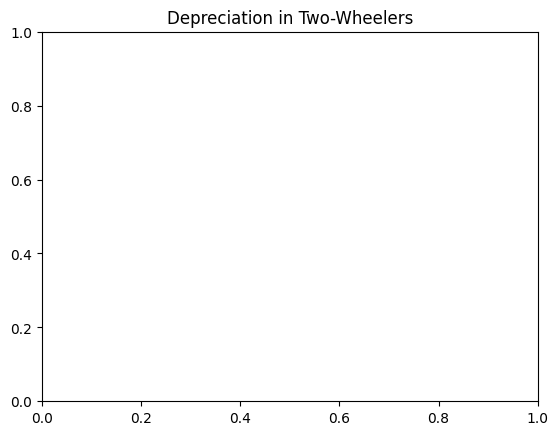

In [38]:
# 22. Reason for unexpected two-wheeler deals
sns.boxplot(x=two_wheelers['Depreciation'])
plt.title("Depreciation in Two-Wheelers")
plt.show()

In [39]:
# 23. Data of only cars
cars = data[~data['Car_Name'].str.contains('bike|scooter', case=False, na=False)]
print("Cars in data:\n", cars)

Cars in data:
     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  Depreciation  Brand  
0        Dealer       Manual      0  

In [40]:
# 24. Oldest car sold
oldest_car = cars.sort_values(by='Year').head(1)
print("Oldest car sold:", oldest_car[['Car_Name', 'Year']])

Oldest car sold:    Car_Name  Year
37      800  2003


In [41]:
# 25. Newest car sold
newest_car = cars.sort_values(by='Year', ascending=False).head(1)
print("Newest car sold:", newest_car[['Car_Name', 'Year']])

Newest car sold:         Car_Name  Year
5  vitara brezza  2018


In [42]:
# 26. Deals in cars exceeding expectations
high_depreciation_cars = cars[cars['Depreciation'] > cars['Depreciation'].quantile(0.95)]
print("Car deals exceeding expectations:\n", high_depreciation_cars)

Car deals exceeding expectations:
          Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
50       fortuner  2012          14.90          30.61      104707    Diesel   
53       fortuner  2013          16.00          30.61      135000    Diesel   
57  corolla altis  2010           4.75          18.54       50000    Petrol   
59       fortuner  2014          19.99          35.96       41000    Diesel   
60  corolla altis  2013           6.95          18.61       40001    Petrol   
62       fortuner  2014          18.75          35.96       78000    Diesel   
63       fortuner  2015          23.50          35.96       47000    Diesel   
78  corolla altis  2010           5.25          22.83       80000    Petrol   
79       fortuner  2012          14.50          30.61       89000    Diesel   
85          camry  2006           2.50          23.73      142000    Petrol   
86   land cruiser  2010          35.00          92.60       78000    Diesel   
90  corolla altis

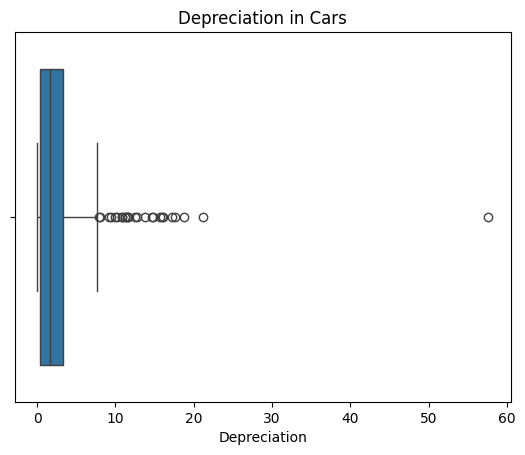

In [43]:
# 27. Reason for unexpected car deals
sns.boxplot(x=cars['Depreciation'])
plt.title("Depreciation in Cars")
plt.show()